# Template for a EUGENe workflow on a new dataset

**Authorship:**
Adam Klie, *08/07/2022*
***
**Description:**
Template notebook for creating a EUGENe workflow on a new dataset. To see a full list of functionality, check out the [API](https://eugenegroup.github.io/EUGENE/api/). You can always use `?` to see the available parameters for each method
***

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload 
%autoreload 2

import os
import numpy as np
import pandas as pd
import eugene as eu

# Configure EUGENe 
print(eu.__version__)
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/junD"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/junD" 
eu.settings.dl_num_workers = 4
eu.settings.batch_size = 128

Global seed set to 13


0.1.0


# Dataloading
We first need to load our data into memory. If the dataset is a "EUGENe benchmarking dataset", it can be loaded in through the `dataset` module:
    
```python
eu.datasets.random1000()
```

If the requested dataset requires a download, it will be downloaded and loaded in automatically. Use `get_dataset_info()` to get information about the datasets available as "EUGENe benchmarking datasets".

---

You can also read from standard file formats into `SeqData` objects using `read_` functions from the `dataloading` module:

```python
eu.dl.read_csv('datasets/random1000/random1000_seqs.tsv')
```

In [2]:
#eu.dl.read_csv(
#    filename=os.path.join(eu.settings.dataset_dir, "junD", "junD_raw_seqs.tsv"), 
#    seq_col="seq",
#    target_col="target",
#    name_col="name"
#)

#eu.dl.read_numpy(
#    seq_file=os.path.join(eu.settings.dataset_dir, "junD", "junD_raw_ohe_seqs.npy"), 
#    target_file=os.path.join(eu.settings.dataset_dir, "junD", "junD_raw_targets.npy"),
#    ohe=True
#)

sdata = eu.dl.read_h5sd(
    filename=os.path.join(eu.settings.dataset_dir, "junD", "junD_raw.h5sd"),
)

# Data Visualization
Data visualization is a key part of the EUGENe workflow. We can use the `plotting` module to visualize aspects of our dataset like target value distributions and sequence length:

```python
sdata["SEQ_LEN"] = [len(seq) for seq in sdata.seqs]
eu.pl.histplot(
    sdata, 
    keys="SEQ_LEN", 
    orient="h")
)
eu.pl.violinplot(
    sdata,
    keys="target",
    groupby="group",
    hue="subgroup",
    xlab="Group",
    ylab="Target",
    title="Target distribution"
)
```

The above commands are examples that show the distribution of sequence lengths and the distribution of target values as a histogram and a violin plot respectively.

In [3]:
# Get sequence lengths
sdata["seq_len"] = [len(seq) for seq in sdata.seqs]

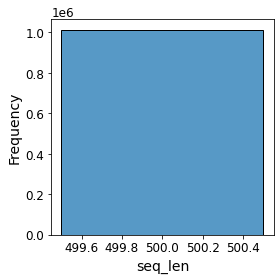

In [4]:
eu.pl.histplot(
    sdata, 
    keys="seq_len", 
    orient="h"
)

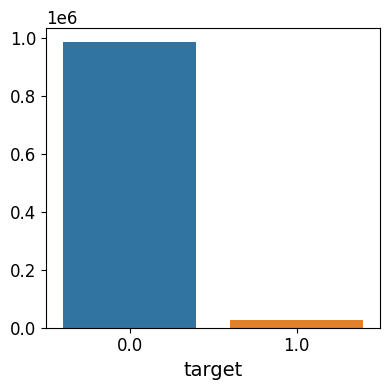

In [5]:
eu.pl.countplot(
    sdata,
    keys="target"
)

# Preprocessing
We can preprocess our data using the `preprocessing` module. This includes:

- reverse complementing sequences: ```eu.pp.reverse_complement_data(sdata)```
- one hot encoding of the target values: ```eu.pp.one_hot_encode_data(sdata)```
- training/validation/test split: ```eu.pp.train_test_split(sdata, test_size=0.2, random_state=42)```
- scaling the target values: ```eu.pp.scale_data(sdata)```
- and more!

Users are encouraged to take a look at the API for more functions you can use. Most users, however, can use the `eu.pp.prepare_data(sdata)` function to get there data ready for training.


In [6]:
# TODO: Preprocess your sequences and targets

In [7]:
eu.pp.add_ranges_annot(sdata)

{'chr_delim': ':', 'rng_delim': '-', 'copy': False} (SeqData object with = 1013080 seqs
seqs = (1013080,)
names = (1013080,)
rev_seqs = None
ohe_seqs = (1013080, 500, 4)
ohe_rev_seqs = None
seqs_annot: 'chr', 'end', 'seq_len', 'start', 'target', 'train'
pos_annot: None
seqsm: None
uns: None,) <class 'eugene.dataloading.dataloaders._SeqData.SeqData'>


In [8]:
eu.pp.train_test_split_data(
    sdata, 
    train_key="train",
    chr = ["chr3"]
)

{'train_key': 'train', 'chr': ['chr3'], 'copy': False} (SeqData object with = 1013080 seqs
seqs = (1013080,)
names = (1013080,)
rev_seqs = None
ohe_seqs = (1013080, 500, 4)
ohe_rev_seqs = None
seqs_annot: 'chr', 'end', 'seq_len', 'start', 'target', 'train'
pos_annot: None
seqsm: None
uns: None,) <class 'eugene.dataloading.dataloaders._SeqData.SeqData'>


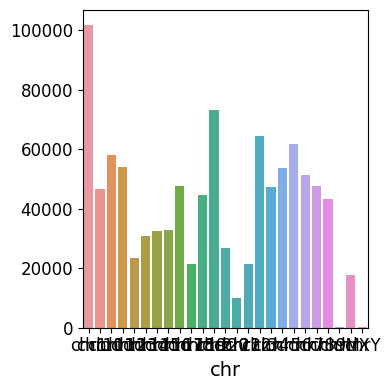

In [9]:
eu.pl.countplot(
    sdata,
    keys="chr"
)

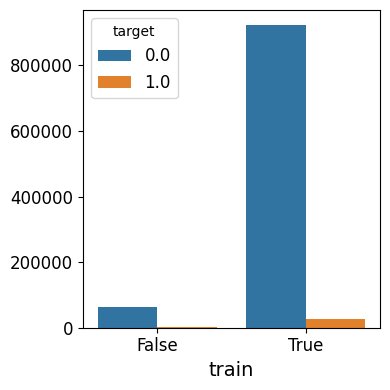

In [10]:
eu.pl.countplot(
    sdata,
    keys="train",
    hue="target"
)

In [11]:
sdata.seqs_annot

,chr,end,seq_len,start,target,train
chr1:990650-991150,chr1,991150,500,990650,0.0,True
chr1:990850-991350,chr1,991350,500,990850,0.0,True
chr1:991050-991550,chr1,991550,500,991050,0.0,True
chr1:991250-991750,chr1,991750,500,991250,0.0,True
chr1:991450-991950,chr1,991950,500,991450,0.0,True
...,...,...,...,...,...,...
chrY:15480450-15480950,chrY,15480950,500,15480450,0.0,True
chrY:15480650-15481150,chrY,15481150,500,15480650,0.0,True
chrY:15480850-15481350,chrY,15481350,500,15480850,0.0,True
chrY:15481050-15481550,chrY,15481550,500,15481050,0.0,True


In [12]:
sdata_train = sdata[sdata["train"].values]
sdata_test = sdata[~sdata["train"].values]

In [13]:
sdata_train, sdata_test

(SeqData object with = 948771 seqs
 seqs = (948771,)
 names = (948771,)
 rev_seqs = None
 ohe_seqs = (948771, 500, 4)
 ohe_rev_seqs = None
 seqs_annot: 'chr', 'end', 'seq_len', 'start', 'target', 'train'
 pos_annot: None
 seqsm: None
 uns: None,
 SeqData object with = 64309 seqs
 seqs = (64309,)
 names = (64309,)
 rev_seqs = None
 ohe_seqs = (64309, 500, 4)
 ohe_rev_seqs = None
 seqs_annot: 'chr', 'end', 'seq_len', 'start', 'target', 'train'
 pos_annot: None
 seqsm: None
 uns: None)

In [14]:
sdata_train["chr"].value_counts().sort_index(), sdata_test["chr"].value_counts().sort_index()

(chr1     101752
 chr10     46642
 chr11     58193
 chr12     54162
 chr13     23593
 chr14     30690
 chr15     32528
 chr16     33013
 chr17     47697
 chr18     21394
 chr19     44522
 chr2      73224
 chr20     26908
 chr21     10060
 chr22     21565
 chr4      47435
 chr5      53688
 chr6      61670
 chr7      51281
 chr8      47548
 chr9      43141
 chrM         82
 chrX      17681
 chrY        302
 Name: chr, dtype: int64,
 chr3    64309
 Name: chr, dtype: int64)

In [15]:
# TODO: Visualize after preprocessing to sanity check

In [16]:
eu.pp.train_test_split_data(
    sdata_train,
    train_key="val",
    chr=["chr2"]
)

{'train_key': 'val', 'chr': ['chr2'], 'copy': False} (SeqData object with = 948771 seqs
seqs = (948771,)
names = (948771,)
rev_seqs = None
ohe_seqs = (948771, 500, 4)
ohe_rev_seqs = None
seqs_annot: 'chr', 'end', 'seq_len', 'start', 'target', 'train'
pos_annot: None
seqsm: None
uns: None,) <class 'eugene.dataloading.dataloaders._SeqData.SeqData'>
SeqData object modified:
    seqs_annot:
        + val


In [18]:
t = eu.datasets.random1000()

In [19]:
eu.pp.prepare_data(t)

{'steps': ['reverse_complement', 'one_hot_encode', 'train_test_split'], 'copy': False} (SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = None
ohe_seqs = None
ohe_rev_seqs = None
seqs_annot: 'target'
pos_annot: PyRanges object with 1400 features
seqsm: None
uns: None,) <class 'eugene.dataloading.dataloaders._SeqData.SeqData'>


  0%|          | 0/3 [00:00<?, ?it/s]

SeqData object modified:
	rev_seqs: None -> 1000 rev_seqs added
	ohe_seqs: None -> 1000 ohe_seqs added
	ohe_rev_seqs: None -> 1000 ohe_rev_seqs added
    seqs_annot:
        + train


In [20]:
t.ohe_seqs.shape

(1000, 66, 4)

In [42]:
sdata_train.ohe_seqs.shape

(948771, 500, 4)

In [36]:
sdataset = sdata_test.to_dataset(target="target", transform_kwargs={"transpose": True})

No transforms given, assuming just need to tensorize).


In [37]:
sdataloader = sdataset.to_dataloader(batch_size=128)

In [38]:
x = next(iter(sdataloader))[1]

In [39]:
x

tensor([[[0., 0., 0.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 1., 0.]],

        [[0., 0., 0.,  ..., 0., 1., 0.],
         [1., 1., 0.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 1., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 1., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 1., 0.,  ..., 0., 1., 0.]],

        [[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 1.]],

        [[0., 0., 0.,  ..., 0., 1., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 1., 0

In [40]:
model = eu.models.DeepBind(input_len=500, output_dim=1)

In [26]:
sdata_train["val"].value_counts()

True     875547
False     73224
Name: val, dtype: int64

# Training
Now that we have our data ready, it's time to train our model. This starts with instantiating and initializing our model. We can use the `models` module to do this:

```python
model = eu.models.DeepBind(
    input_len=100,
    output_dim=1,
    scheduler = "reduce_lr_on_plateau",
    scheduler_patience=2,
    lr=0.001
)
model.summary()
eu.models.init_weights(model)
```

We offer several options for instantiating a model architecture. Take a look at the API for more options and details.
- The `Base Model`s contain the 4 common base architectures: FCN, CNN, RNN and Hybrid. 
- The `SOTA Model`s contain 2 SOTA architectures: DeepBind and DeepSEA.
- The `Custom Models` are models that you can add to. We have  a single custom model currently implemented to serve as a template (`Jores21CNN`). Who knows? Maybe your custom model will become SOTA!

In [56]:
# TODO: Instantiate your model
model = eu.models.load_config(
    arch="CNN", 
    model_config="/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/junD/dsCNN.yaml"
)

{'input_len': 500, 'output_dim': 1, 'conv_kwargs': {'channels': [4, 10, 8], 'conv_kernels': [11, 3], 'pool_kernels': [30], 'pool_strides': [1], 'dropout_rates': 0.2, 'batchnorm': True, 'omit_final_pool': True}, 'strand': 'ss', 'task': 'binary_classification', 'aggr': None, 'loss_fxn': 'bce', 'fc_kwargs': {}, 'optimizer': 'adam', 'lr': 0.001, 'scheduler': 'reduce_lr_on_plateau', 'scheduler_patience': 2, 'hp_metric': None}


In [57]:
model

CNN(
  (hp_metric): AUROC()
  (convnet): BasicConv1D(
    (module): Sequential(
      (0): Conv1d(4, 10, kernel_size=(11,), stride=(1,))
      (1): ReLU()
      (2): MaxPool1d(kernel_size=30, stride=1, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
      (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv1d(10, 8, kernel_size=(3,), stride=(1,))
      (6): ReLU()
      (7): Dropout(p=0.2, inplace=False)
      (8): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (fcnet): BasicFullyConnectedModule(
    (module): Sequential(
      (0): Linear(in_features=3672, out_features=1, bias=True)
    )
  )
)

In [58]:
model.loss_fxn

<function torch.nn.functional.binary_cross_entropy_with_logits(input: torch.Tensor, target: torch.Tensor, weight: Union[torch.Tensor, NoneType] = None, size_average: Union[bool, NoneType] = None, reduce: Union[bool, NoneType] = None, reduction: str = 'mean', pos_weight: Union[torch.Tensor, NoneType] = None) -> torch.Tensor>

In [53]:
# TODO: Initialize your models parameters
eu.models.base.init_weights(model)

With a model intantiated and initialized, we are set up to train our model. We can do this through the `train` module:

```python
eu.train.fit(
    model=model, 
    sdata=sdata, 
    gpus=1, 
    target="target",
    train_key="train",
    epochs=50,
    version=f"v1"
)
```


In [59]:
eu.train.fit(
    model=model, 
    sdata=sdata_train, 
    target="target",
    train_key="val",
    epochs=1,
    version=f"v1"
)

No transforms given, assuming just need to tensorize).
No transforms given, assuming just need to tensorize).


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Set SLURM handle signals.

  | Name      | Type                      | Params
--------------------------------------------------------
0 | hp_metric | AUROC                     | 0     
1 | convnet   | BasicConv1D               | 734   
2 | fcnet     | BasicFullyConnectedModule | 3.7 K 
--------------------------------------------------------
4.4 K     Trainable params
0         Non-trainable params
4.4 K     Total params
0.018     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 13


Training: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)


Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.106


We can see how well our models trained by plotting a training summary:

```python
eu.train.pl_training_summary(model_leaf, version=f"v1")
```

In [64]:
eu.predict.train_val_predictions(
    model,
    sdata=sdata_train,
    target="target",
    train_key="val",
    version="v1"
)

{'sdata': SeqData object with = 948771 seqs
seqs = (948771,)
names = (948771,)
rev_seqs = None
ohe_seqs = (948771, 500, 4)
ohe_rev_seqs = None
seqs_annot: 'chr', 'end', 'seq_len', 'start', 'target', 'train', 'val'
pos_annot: None
seqsm: None
uns: None, 'target': 'target', 'train_key': 'val', 'gpus': None, 'batch_size': None, 'num_workers': None, 'out_dir': None, 'name': None, 'version': 'v1', 'file_label': '', 'sdataset': None, 'sdataloader': None, 'seq_transforms': None, 'transform_kwargs': {'transpose': True}, 'copy': False} (CNN(
  (hp_metric): AUROC()
  (convnet): BasicConv1D(
    (module): Sequential(
      (0): Conv1d(4, 10, kernel_size=(11,), stride=(1,))
      (1): ReLU()
      (2): MaxPool1d(kernel_size=30, stride=1, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.2, inplace=False)
      (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Conv1d(10, 8, kernel_size=(3,), stride=(1,))
      (6): ReLU()
      (7): Dropout

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + target_predictions


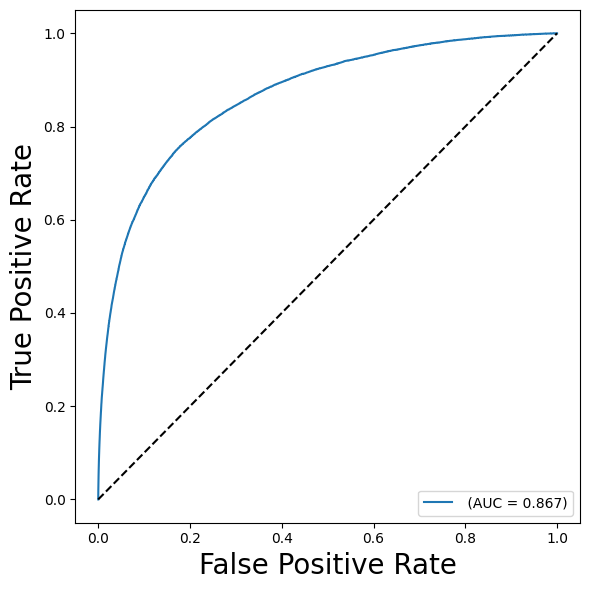

In [68]:
eu.pl.auroc(sdata_train, targets="target", predictions="target_predictions")

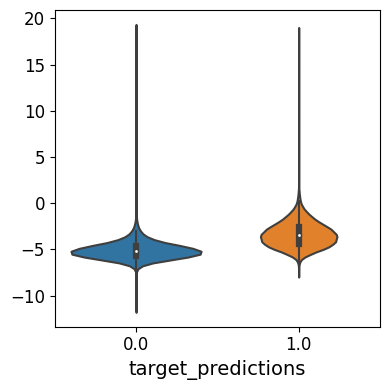

In [69]:
eu.pl.violinplot(sdata_train, keys="target_predictions", groupby="target")

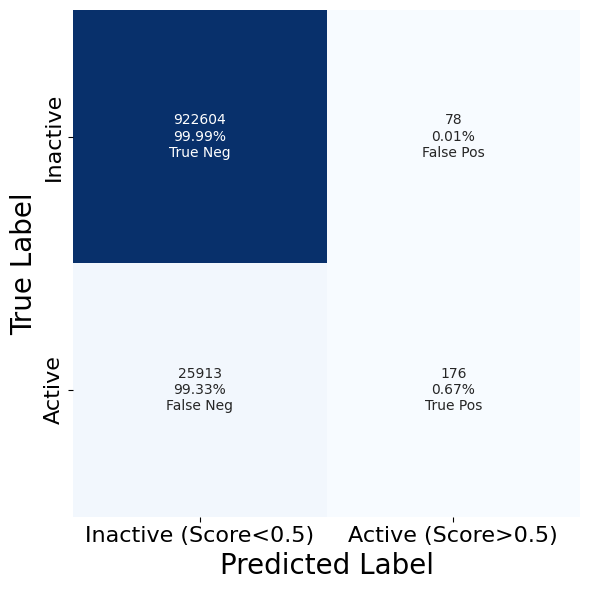

In [70]:
eu.pl.confusion_mtx(
    sdata_train,
    target="target",
    prediction="target_predictions"
)

# Evaluation
After the model's been trained, we can evaluate our performance on our training data and our held-out test data. This is done through the `plotting` module.
It is often best to use the model that achieved the lowest loss on the validation data for evaluation. We can load this model in from the log directory:
```python
best_model = eu.models.DeepBind.load_from_checkpoint("...")
```
We can then use this model to make predictions on our training and validation data and to visualize the performance:
```python
eu.predict.train_val_predictions(
    best_model, 
    sdata=sdata, 
    target="target",
    train_key="train",
    version=f"v1",
)
train_idx = np.where(sdata_leaf_train["train"] == True)[0]
eu.pl.performance_scatter(
    sdata, 
    seq_idx=train_idx, 
    target="target", 
    prediction="target_predictions",
    title="Training Set Performance",
    alpha=0.5,
)
```

In [ ]:
# TODO: See how you performed and the training and validation sets

It is important to understand how the model is performing on a held-out (and ideally independent) test set. You should either load this separately above, here or have split your data up in preprocessing (see `jores21_analysis.ipynb` for an example).

```python
eu.predict.predictions(
    best_model, 
    sdata=sdata, 
    target="target",
    version=f"v1",
    file_label="test"
)
eu.predict.predictions(
    best_model, 
    sdata=sdata, 
    target="target",
    version=f"v1",
    file_label="test"
)

In [ ]:
# TODO: If you have a test set, see how you did on that

# Interpretation
Potentially the most important step in the EUGENe workflow is the interpretation of the model's predictions. This is done through the `interpret` module. All the functions in this module act on either `SeqData` and Models or just Models. Results from these calls can be visualized using the `plotting` module.
---
There are many options for interpreting the model's predictions, and we will again point users to the API for all the options and their arguments. We list examples for a few common ones below.


```python
eu.interpret.generate_pfms(
    best_model_leaf, 
    sdata_leaf_test
)
```

## Feature attribution
We can calculate the contribution of each nucleotide to the model's predictions for a sequence by using the `interpret` module's `feature_attribution` function. We currently implement several different methods for this, includeing `DeepLift, ISM, InputXGradient and DeepSHAP`.
```python
eu.interpret.feature_attribution(
    best_model,
    sdata_test,
    saliency_method="DeepLift",
    device= "cuda" if eu.settings.gpus > 0 else "cpu"
)
```

In [6]:
# TODO: Run feature attribution on your model

## Filter Visualization 
We can get an idea for what each filter of first convoulional layer of the model is seeing by using the `interpret` module's `generate_pfms` function. This creates a position frequency matrix for each filter in the model using sequences that highly activate that filter (can be defined in multiple ways). We often times pass the the test sequences through the model, but you can theoretically pass any sequences you want.
```python
eu.interpret.generate_pfms(
    best_model, 
    sdata_test
)
```

In [7]:
# TODO: Run filter visualization on your model

## Other intepretation methods
We currently implement a few other methods for interpreting the model's predictions. These include:
- Dimensionality Reduction on your importance scores: e.g. `eu.interpret.pca`
- ...
We are looking to add more! If you are interested in contributing...

In [ ]:
# TODO: Perform other intepretation methods on your trained model

# Wrapping up
EUGENe is very much meant to be a community project. It represents a collection of data, models, and techniques meant for analyzing sequence data with deep learning. We are looking for contributions in almost every aspect of EUGENe. We are particularly interested in:

- New model additions through the `models` module
- New dataset additions through the `datasets` module
- New preprocessing techniques through the `preprocessing` module
- New visualization techniques through the `plotting` module
- New interpretation techniques through the `interpret` module
- New methods for training models in the `train` module

Please do not hesitate to contact us if you have any questions or suggestions.

---